In [2]:
library(e1071) # e1071 code name for a stat dept that developed this package

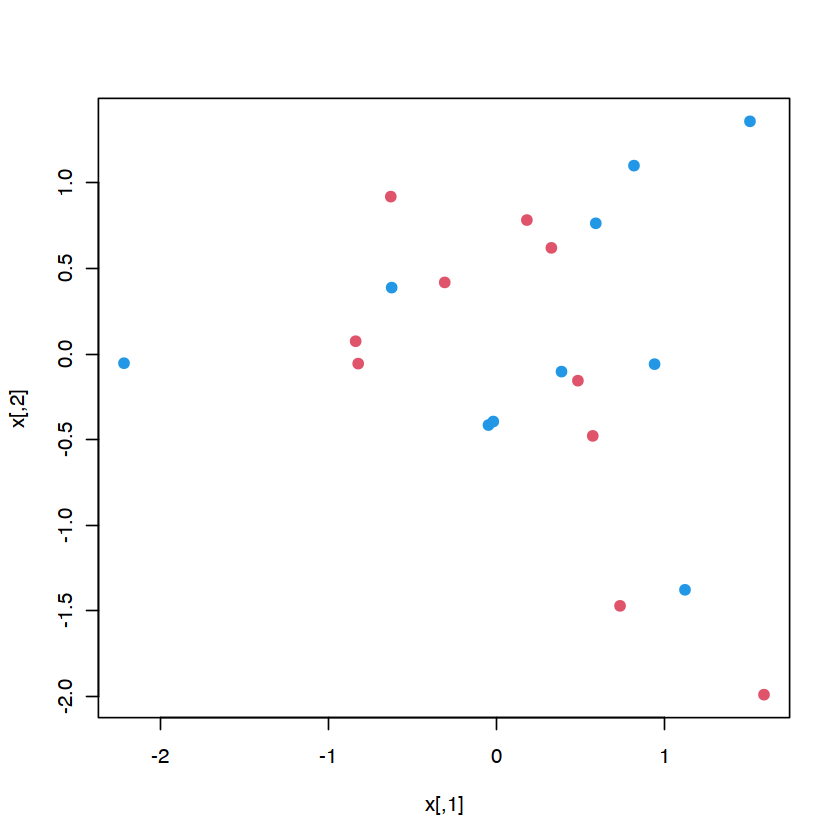

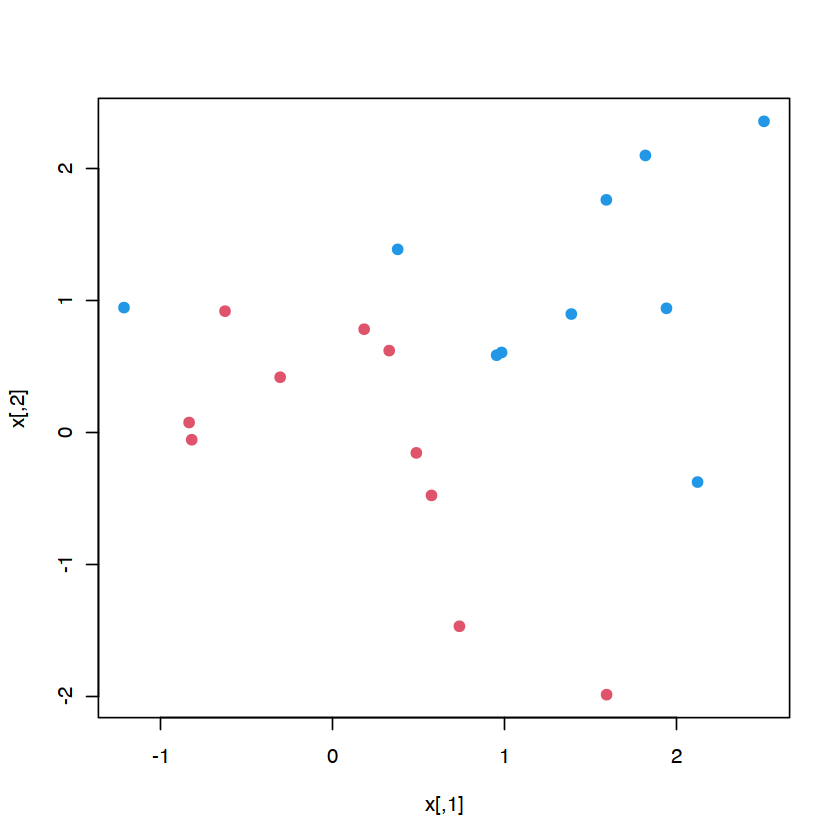

In [3]:
#generate data and make it separable 
set.seed(1)
x = matrix(rnorm(40), ncol=2)
y = c(rep(-1, 10), rep(1, 10))
plot(x, col=y+3, pch=19)
#make data separable
x[y==1,] = x[y==1,] + 1
plot(x, col=y+3, pch=19)
#create dataframe
dat=data.frame(x=x, y=as.factor(y))

# Linear SVM


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  7



Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  7

 ( 4 3 )


Number of Classes:  2 

Levels: 
 -1 1




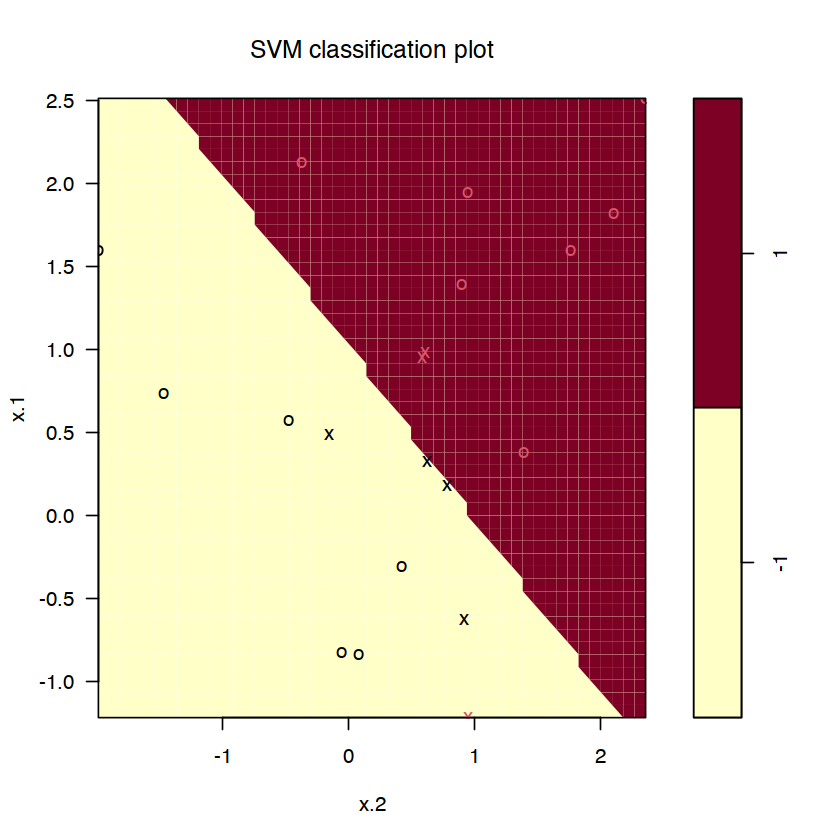

In [4]:
#fit linear svm
svmfit = svm(y~., data=dat, kernel="linear", cost=10, scale=FALSE)
#scale each feature to have mean zero or standard deviation one
svmfit
summary(svmfit)
plot(svmfit, dat)


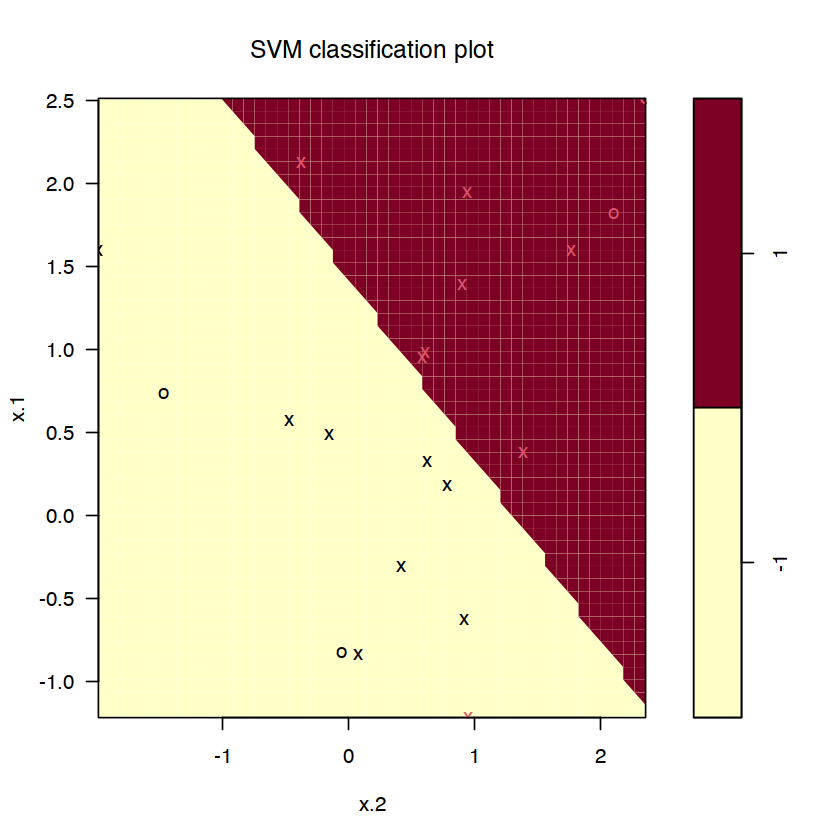

In [5]:
#change cost value
svmfit = svm(y~., data=dat, kernel="linear", cost=0.1, scale=FALSE)
plot(svmfit, dat)

In [6]:
#tune() performs 10-fold cross-validation on a set of models of interest
tune.out = tune(svm, y~., data=dat, kernel="linear", ranges=list(cost=c(0.001,0.01,0.1,1,5,10,100)))
summary(tune.out)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    5

- best performance: 0.1 

- Detailed performance results:
   cost error dispersion
1 1e-03  0.65  0.4743416
2 1e-02  0.65  0.4743416
3 1e-01  0.15  0.3374743
4 1e+00  0.15  0.2415229
5 5e+00  0.10  0.2108185
6 1e+01  0.10  0.2108185
7 1e+02  0.15  0.2415229


In [7]:
bestmod = tune.out$best.model
summary(bestmod)


Call:
best.tune(method = svm, train.x = y ~ ., data = dat, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 5, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  5 

Number of Support Vectors:  8

 ( 4 4 )


Number of Classes:  2 

Levels: 
 -1 1




## Test

In [8]:
#generate test dataset, then predict
xtest = matrix(rnorm(20*2), ncol=2)
ytest = sample(c(-1,1), 20, rep=TRUE)
xtest[ytest==1,] = xtest[ytest==1,] + 1
testdat = data.frame(x=xtest, y=as.factor(ytest))
ypred = predict(bestmod, testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 10  2
     1   1  7

In [9]:
svmfit=svm(y~., data=dat, kernel="linear", cost=.01, scale=FALSE)
ypred=predict(svmfit,testdat)
table(predict=ypred, truth=testdat$y)

       truth
predict -1  1
     -1 11  5
     1   0  4

## Reduce signal

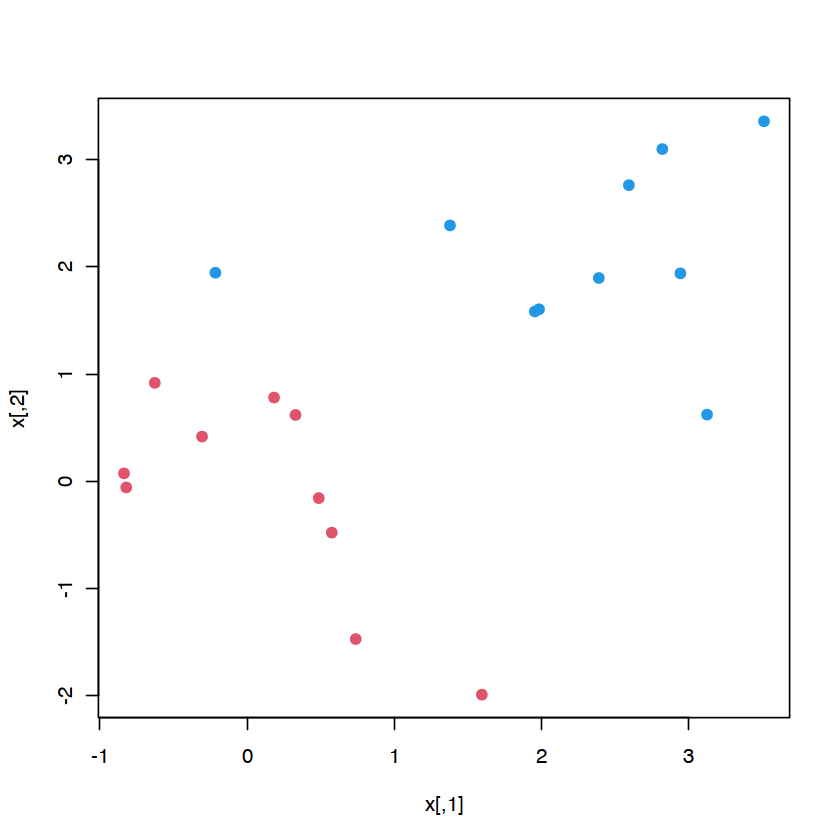

In [13]:
x[y==1,] = x[y==1,] + 0.5
plot(x, col=(y+3), pch=19)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1e+05 

Number of Support Vectors:  3

 ( 1 2 )


Number of Classes:  2 

Levels: 
 -1 1




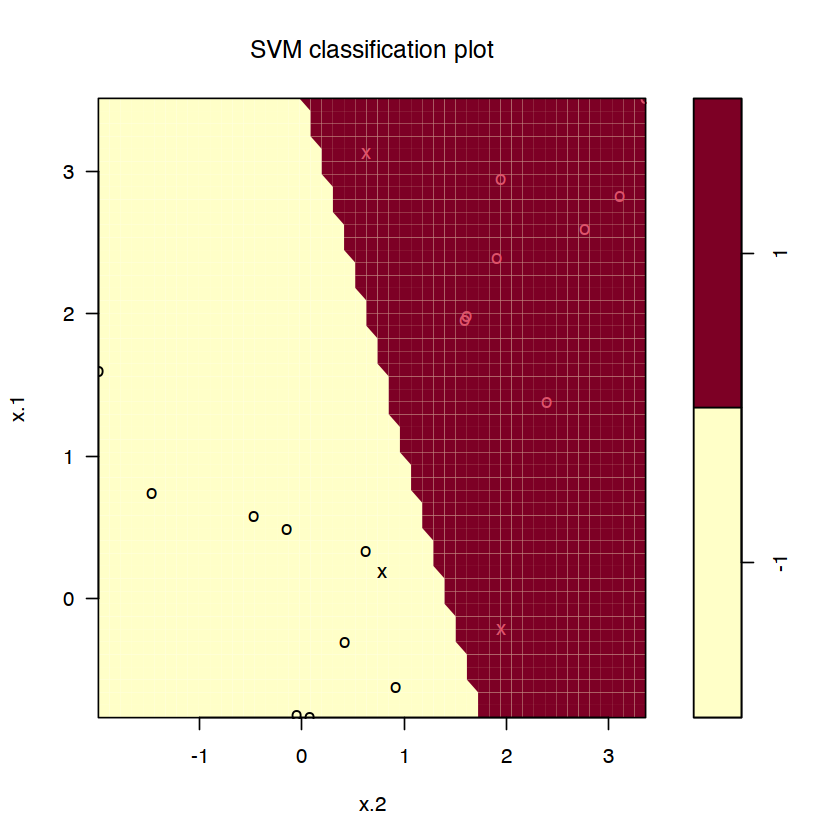

In [14]:
dat = data.frame(x=x, y=as.factor(y))
svmfit = svm(y~., data=dat, kernel="linear", cost=1e5) #100000
summary(svmfit)
plot(svmfit, dat)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  5

 ( 2 3 )


Number of Classes:  2 

Levels: 
 -1 1




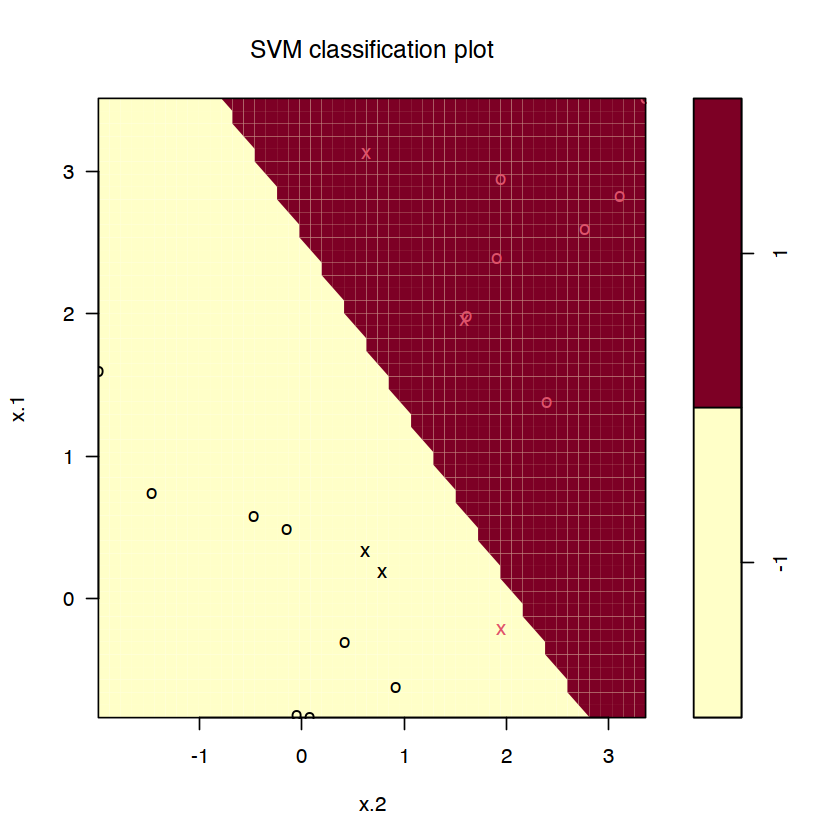

In [15]:
svmfit=svm(y~., data=dat, kernel="linear", cost=1)
summary(svmfit)
plot(svmfit,dat)

# Nonlinear

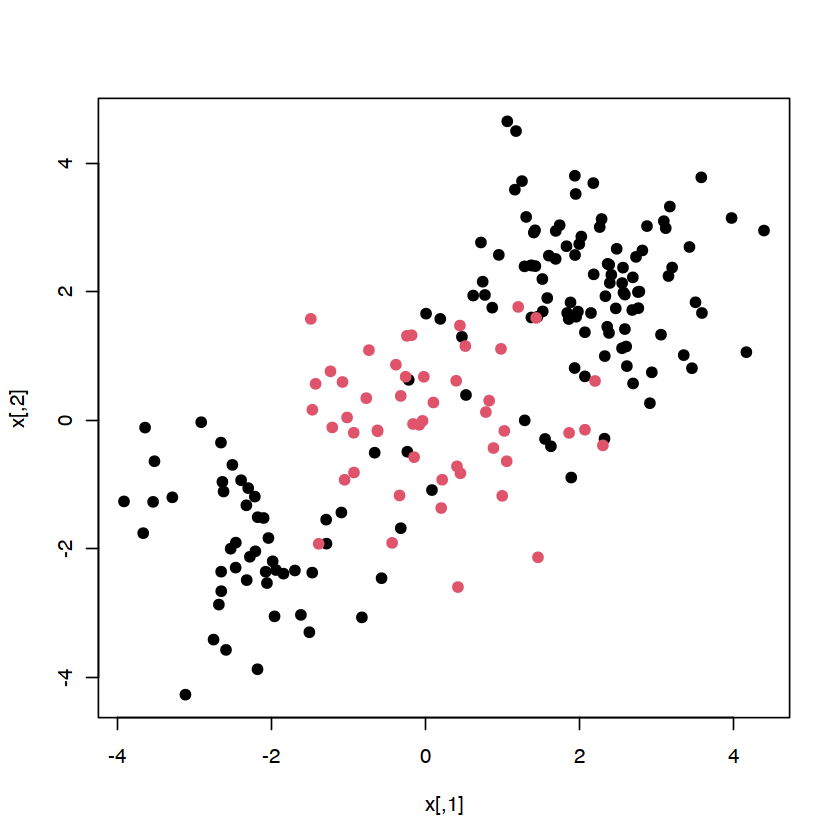

In [16]:
set.seed(1)
x = matrix(rnorm(200*2), ncol=2)
x[1:100,]   = x[1:100,]   + 2
x[101:150,] = x[101:150,] - 2
y = c(rep(1,150), rep(2,50))
dat = data.frame(x=x, y=as.factor(y))
plot(x, col=y, pch=19)


Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  31

 ( 16 15 )


Number of Classes:  2 

Levels: 
 1 2




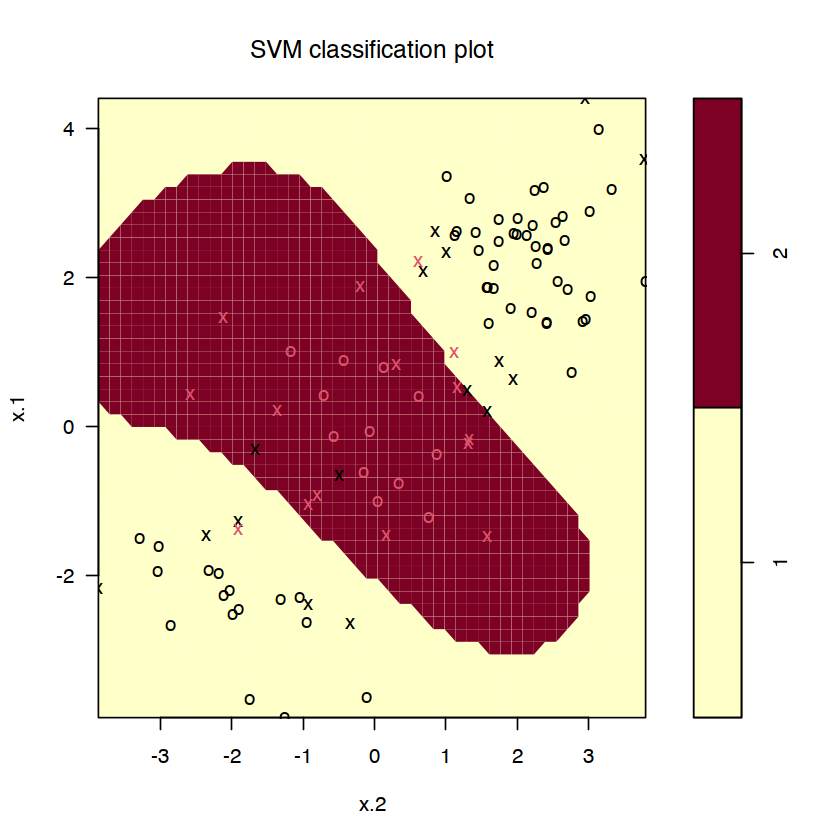

In [17]:
train = sample(200, 100)
#fit kernel-svm
svmfit = svm(y~., data=dat[train,], kernel="radial",  gamma=1, cost=1)
plot(svmfit, dat[train,])
summary(svmfit)



Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1e+05)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1e+05 

Number of Support Vectors:  16

 ( 7 9 )


Number of Classes:  2 

Levels: 
 1 2




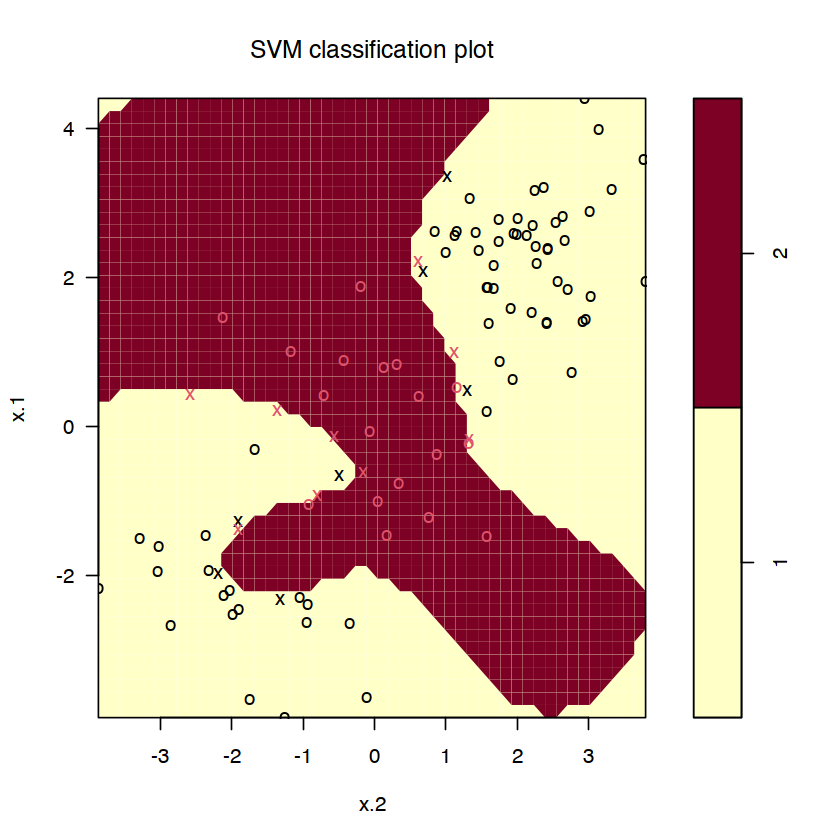

In [18]:
svmfit = svm(y~., data=dat[train,], kernel="radial", gamma=1, cost=1e5)
plot(svmfit,dat[train,])
summary(svmfit)


In [19]:
#use tune function
set.seed(1)
tune.out = tune(svm, y~., data=dat[train,], kernel="radial", ranges=list(cost=c(0.1,1,10,100,1000), gamma=c(0.5,1,2,3,4)))
summary(tune.out)
#predict
table(true=dat[-train,"y"], pred=predict(tune.out$best.model, newdata=dat[-train,]))



Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.07 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.26 0.15776213
2  1e+00   0.5  0.07 0.08232726
3  1e+01   0.5  0.07 0.08232726
4  1e+02   0.5  0.14 0.15055453
5  1e+03   0.5  0.11 0.07378648
6  1e-01   1.0  0.22 0.16193277
7  1e+00   1.0  0.07 0.08232726
8  1e+01   1.0  0.09 0.07378648
9  1e+02   1.0  0.12 0.12292726
10 1e+03   1.0  0.11 0.11005049
11 1e-01   2.0  0.27 0.15670212
12 1e+00   2.0  0.07 0.08232726
13 1e+01   2.0  0.11 0.07378648
14 1e+02   2.0  0.12 0.13165612
15 1e+03   2.0  0.16 0.13498971
16 1e-01   3.0  0.27 0.15670212
17 1e+00   3.0  0.07 0.08232726
18 1e+01   3.0  0.08 0.07888106
19 1e+02   3.0  0.13 0.14181365
20 1e+03   3.0  0.15 0.13540064
21 1e-01   4.0  0.27 0.15670212
22 1e+00   4.0  0.07 0.08232726
23 1e+01   4.0  0.09 0.07378648
24 1e+02   4.0  0.13 0.14181365
25 1e+03   4.0  0.15 0

    pred
true  1  2
   1 67 10
   2  2 21

# Multiple Class

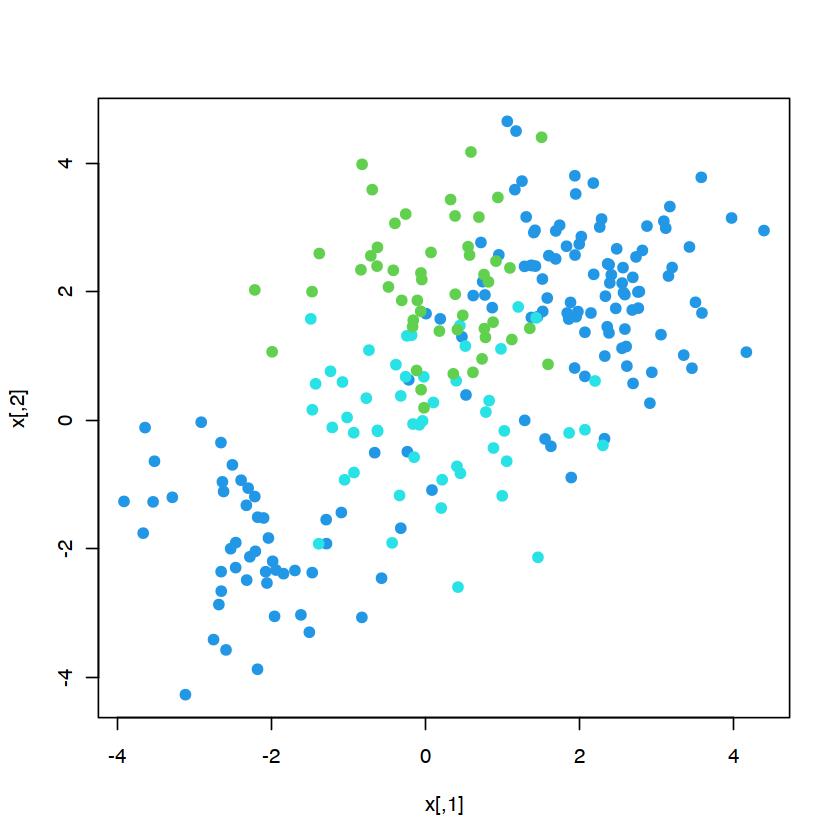

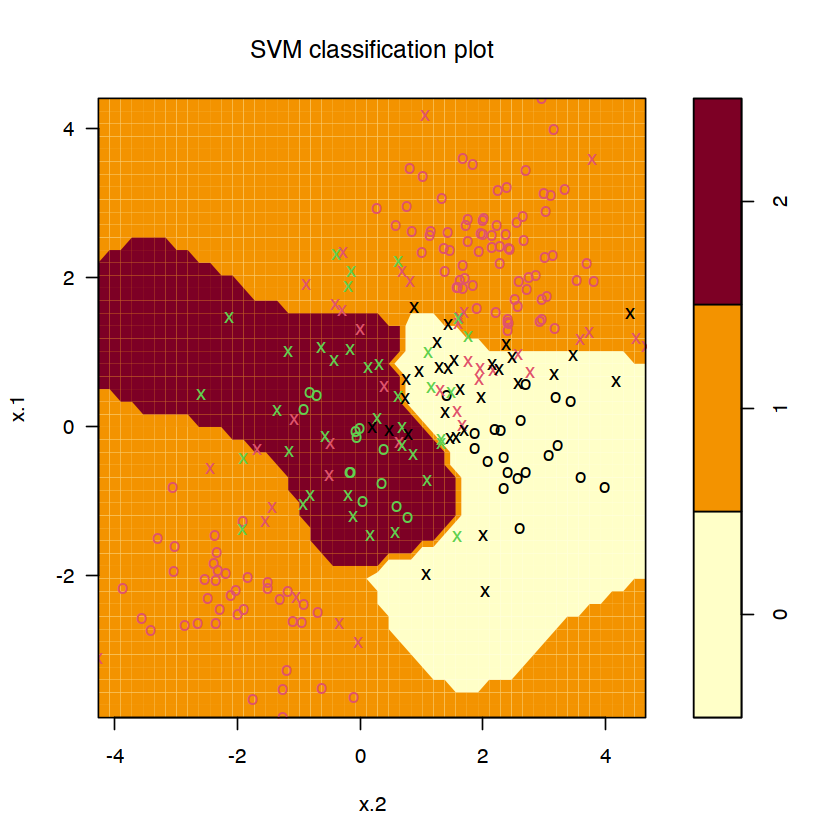

In [20]:
#svm() function will perform multi-class classification using the one-versus-one approach
set.seed(1)
x = rbind(x, matrix(rnorm(50*2), ncol=2))
y = c(y, rep(0,50))
x[y==0,2] = x[y==0,2] + 2
dat = data.frame(x=x, y=as.factor(y))
par(mfrow=c(1,1))
plot(x, col=(y+3), pch=19)
svmfit = svm(y~., data=dat, kernel="radial", cost=10, gamma=1)
plot(svmfit, dat)

# SVM Regression

e1071 library can also be used to perform support vector regression, 
if the response vector that is passed in to svm() is numerical rather than a factor

In [22]:
#Example: Application to Gene Expression Data
library(ISLR)
names(Khan) ##the Khan data set
#consists of a number of tissue samples corresponding to four distinct types of small round blue cell tumors. 
#for each tissue sample, gene expression measurements are available. 
#training data, xtrain and ytrain, and testing data, xtest and ytest.
dim(Khan$xtrain)
dim(Khan$xtest)
length(Khan$ytrain)
length(Khan$ytest)
table(Khan$ytrain)
table(Khan$ytest)

[1] "xtrain" "xtest"  "ytrain" "ytest"

[1]   63 2308

[1]   20 2308

[1] 63

[1] 20


 1  2  3  4 
 8 23 12 20 


1 2 3 4 
3 6 6 5 

In [23]:
#This data set consists of expression measurements for 2,308 genes. 
#The training and test sets consist of 63 and 20 observations respectively.
dat = data.frame(x=Khan$xtrain, y=as.factor(Khan$ytrain))
out = svm(y~., data=dat, kernel="linear", cost=10)
summary(out)
table(out$fitted, dat$y)



Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  58

 ( 20 20 11 7 )


Number of Classes:  4 

Levels: 
 1 2 3 4




   
     1  2  3  4
  1  8  0  0  0
  2  0 23  0  0
  3  0  0 12  0
  4  0  0  0 20

In [24]:
dat.te = data.frame(x=Khan$xtest, y=as.factor(Khan$ytest))
pred.te = predict(out, newdata=dat.te)
table(pred.te, dat.te$y)

       
pred.te 1 2 3 4
      1 3 0 0 0
      2 0 6 2 0
      3 0 0 4 0
      4 0 0 0 5